In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel(r"C:\Users\pauli\Downloads\Online_Retail.xlsx")

In [3]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


customerid - jest floatem, poza tym ma dużo nulli?
description -> nulle

In [5]:
df.describe()

#quantity - duże wartości min i max - do sprawdzenia
#przedział dat - 01-12-2010 do 09-12-2011
#unit price - duzy min i max - do sprawdzenia
#customer id - zmiana float na str

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [6]:
df['CustomerID'] = df['CustomerID'].astype('Int64')
df['CustomerID'] = df['CustomerID'].astype(str)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   541909 non-null  object        
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 33.1+ MB


In [8]:
df.query('Quantity == 80995 or Quantity==-80995')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446,United Kingdom
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446,United Kingdom


In [9]:
df['InvoiceNo'].nunique()

25900

In [10]:
# jaki jest rozklad wartosci faktur?

df_summary_per_invoice = df.copy()
df_summary_per_invoice['Sales'] = df_summary_per_invoice['Quantity']*df_summary_per_invoice['UnitPrice']


In [11]:
df_summary_per_invoice = df_summary_per_invoice.groupby('InvoiceNo')['Sales'].sum()

In [12]:
df_summary_per_invoice

InvoiceNo
536365        139.12
536366         22.20
536367        278.73
536368         70.05
536369         17.85
             ...    
C581484   -168469.60
C581490       -32.53
C581499      -224.69
C581568       -54.75
C581569        -7.50
Name: Sales, Length: 25900, dtype: float64

In [13]:
df_summary_per_invoice.describe(percentiles=[0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99])

count     25900.000000
mean        376.360924
std        2013.261050
min     -168469.600000
1%         -299.412500
5%          -29.404500
25%          11.775000
50%         207.535000
75%         409.085000
95%        1305.634000
99%        4106.868800
max      168469.600000
Name: Sales, dtype: float64

<Axes: xlabel='Sales'>

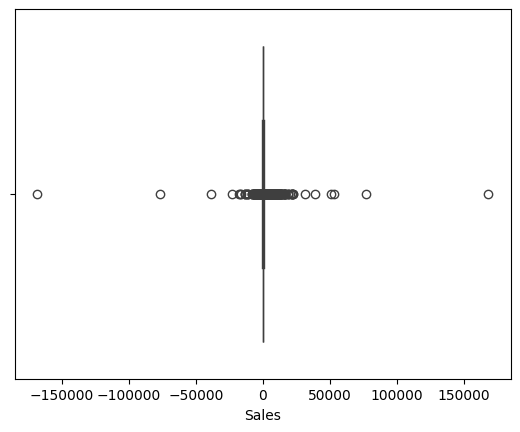

In [14]:
sns.boxplot(x=df_summary_per_invoice)


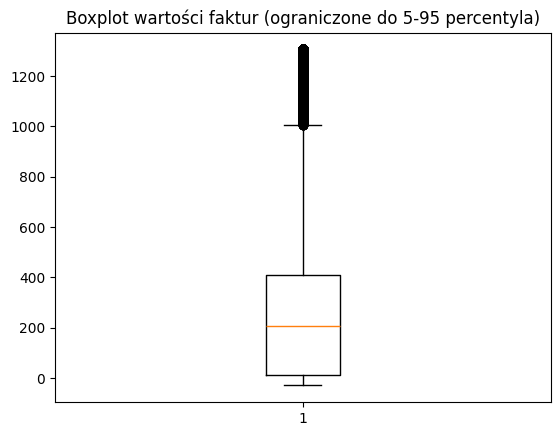

In [15]:
#dane z bardzo duzymi outlierami, dlatego w ogole nie widac boxplotu
#ograniczenie wartosci do p5-p95

p5 = df_summary_per_invoice.quantile(0.05)
p95 = df_summary_per_invoice.quantile(0.95)

# ograniczone dane
df_clip = df_summary_per_invoice.clip(lower=p5, upper=p95)

plt.boxplot(df_clip)
plt.title("Boxplot wartości faktur (ograniczone do 5-95 percentyla)")
plt.show()

5. Faktury [Invoice]:
    - ile mamy faktur?
    - jaki jest rozklad wartosci faktur?
    - ile roznych produktow jest na fakturze?
    - w jakiej liczbie kupowane są produkty?
    - czy da sie zidentyfikowac zwroty?

In [16]:
#ile roznych produktow jest na fakturze? - w sumie nie wiem co rozumiem przez to pytanie
df['StockCode'].nunique()

4070

In [17]:
#w jakiej liczbie kupowane są produkty?
df['Quantity'].describe()

count    541909.000000
mean          9.552250
std         218.081158
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

In [18]:
# czy da sie zidentyfikowac zwroty?

df.query('Quantity < 0')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315,United Kingdom


In [19]:
df['Invoice_First_Char'] = df['InvoiceNo'].astype(str).str[0]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_First_Char
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,5
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,5
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,5
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,5
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,5


In [20]:
df['Invoice_First_Char'].value_counts()

Invoice_First_Char
5    532618
C      9288
A         3
Name: count, dtype: int64

In [21]:
df.query("Invoice_First_Char == 'A'")

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_First_Char
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,<NA>,United Kingdom,A
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,<NA>,United Kingdom,A
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,<NA>,United Kingdom,A


In [22]:
df.query('Invoice_First_Char == "5" and Quantity < 0')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_First_Char
2406,536589,21777,NaN,-10,2010-12-01 16:50:00,0.0,<NA>,United Kingdom,5
4347,536764,84952C,NaN,-38,2010-12-02 14:42:00,0.0,<NA>,United Kingdom,5
7188,536996,22712,NaN,-20,2010-12-03 15:30:00,0.0,<NA>,United Kingdom,5
7189,536997,22028,NaN,-20,2010-12-03 15:30:00,0.0,<NA>,United Kingdom,5
7190,536998,85067,NaN,-6,2010-12-03 15:30:00,0.0,<NA>,United Kingdom,5
...,...,...,...,...,...,...,...,...,...
535333,581210,23395,check,-26,2011-12-07 18:36:00,0.0,<NA>,United Kingdom,5
535335,581212,22578,lost,-1050,2011-12-07 18:38:00,0.0,<NA>,United Kingdom,5
535336,581213,22576,check,-30,2011-12-07 18:38:00,0.0,<NA>,United Kingdom,5
536908,581226,23090,missing,-338,2011-12-08 09:56:00,0.0,<NA>,United Kingdom,5


In [23]:
df.query('Quantity < 0')['Invoice_First_Char'].value_counts()

Invoice_First_Char
C    9288
5    1336
Name: count, dtype: int64

In [24]:
df.query('Quantity < 0 and Invoice_First_Char == "5"')['Description'].value_counts()

Description
check                    120
damages                   45
damaged                   42
?                         41
sold as set on dotcom     20
                        ... 
lost??                     1
wet                        1
wet boxes                  1
????damages????            1
lost                       1
Name: count, Length: 138, dtype: int64

In [25]:
df.query('Quantity < 0 and Invoice_First_Char == "5"')['CustomerID'].value_counts()

CustomerID
<NA>    1336
Name: count, dtype: int64

6. Pozycje na Fakturze [StockCode]:
    - co znajduje sie na fakturze - produkty, dostawa? inne
    - ile mamy produktow? w jakich cenach? Czy cena jest zawsze stala?
    - w jakich ilosciach sa zazwyczaj kupowane? 
    - czy cos sie wyroznia w typach produktow? 
    - czy format codu moze miec jakies znaczenie?

In [26]:
df.query('InvoiceNo == 536365')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_First_Char
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,5
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,5
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,5
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,5
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,5
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom,5
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850,United Kingdom,5


In [27]:
df_stock = df.groupby(['Invoice_First_Char','InvoiceNo'])['StockCode'].nunique().reset_index()
#df_stock = df.groupby(['Invoice_First_Char','InvoiceNo']).nunique().reset_index()
#df_stock.sort_values(ascending=False)

In [28]:
#df_stock.sort_values(by= 'StockCode', ascending=False)
df_stock.query('Invoice_First_Char == "5"').sort_values(by= 'StockCode', ascending=False)

,Invoice_First_Char,InvoiceNo,StockCode
18141,5,573585,1110
21897,5,581219,749
22032,5,581492,731
21645,5,580729,721
10713,5,558475,704
...,...,...,...
4465,5,546020,1
4463,5,546018,1
4461,5,546016,1
4459,5,546014,1


In [29]:
546010
df.query('InvoiceNo == 546010')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_First_Char
114428,546010,22423,damages,-19,2011-03-08 15:55:00,0.0,<NA>,United Kingdom,5


In [30]:
df_q = df.query('Quantity > 0 and Invoice_First_Char == "5"')
df_q_stock = df_q.groupby(['Invoice_First_Char','InvoiceNo'])['StockCode'].nunique().reset_index()
df_q_stock.sort_values(by= 'StockCode', ascending=False)

,Invoice_First_Char,InvoiceNo,StockCode
16985,5,573585,1110
20563,5,581219,749
20696,5,581492,731
20326,5,580729,721
9958,5,558475,704
...,...,...,...
4599,5,546853,1
2001,5,540945,1
20672,5,581458,1
10909,5,560494,1


In [31]:
df.query('InvoiceNo == 581458')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_First_Char
540070,581458,22197,POPCORN HOLDER,1500,2011-12-08 18:45:00,0.72,17949,United Kingdom,5


In [32]:
#ile mamy produktow? w jakich cenach? Czy cena jest zawsze stala?
df['StockCode'].nunique()

4070

In [33]:
df.groupby(['StockCode', 'Description'])['UnitPrice'].nunique().sort_values(ascending=False)
#widać, 

StockCode  Description              
DOT        DOTCOM POSTAGE               687
M          Manual                       260
POST       POSTAGE                      113
D          Discount                      75
S          SAMPLES                       59
                                       ... 
DCGS0069   ebay                           1
DCGS0070   CAMOUFLAGE DOG COLLAR          1
DCGS0073   ebay                           1
16043      POP ART PUSH DOWN RUBBER       1
16033      MINI HIGHLIGHTER PENS          1
Name: UnitPrice, Length: 4792, dtype: int64

In [34]:
df['First_Stock_Sign'] = df['StockCode'].astype(str).str[0]

In [35]:
df['First_Stock_Sign'].value_counts()

First_Stock_Sign
2    438444
8     62988
4     11464
1      7627
7      7223
3      5758
9      4656
P      1260
D       832
5       641
M       571
C       160
6       113
S        63
B        40
A        34
g        34
m         1
Name: count, dtype: int64

In [36]:
df['Is_Stock_Numeric'] = df['First_Stock_Sign'].str.isnumeric()
df.query('Is_Stock_Numeric == False')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_First_Char,First_Stock_Sign,Is_Stock_Numeric
45,536370,POST,POSTAGE,3,2010-12-01 08:45:00,18.00,12583,France,5,P,False
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom,C,D,False
386,536403,POST,POSTAGE,1,2010-12-01 11:27:00,15.00,12791,Netherlands,5,P,False
1123,536527,POST,POSTAGE,1,2010-12-01 13:04:00,18.00,12662,Germany,5,P,False
1423,536540,C2,CARRIAGE,1,2010-12-01 14:05:00,50.00,14911,EIRE,5,C,False
...,...,...,...,...,...,...,...,...,...,...,...
541540,581498,DOT,DOTCOM POSTAGE,1,2011-12-09 10:26:00,1714.17,<NA>,United Kingdom,5,D,False
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498,United Kingdom,C,M,False
541730,581570,POST,POSTAGE,1,2011-12-09 11:59:00,18.00,12662,Germany,5,P,False
541767,581574,POST,POSTAGE,2,2011-12-09 12:09:00,18.00,12526,Germany,5,P,False


In [37]:
df.groupby('Is_Stock_Numeric').agg(
    avg_price = ('UnitPrice', 'mean'),
    avg_quantity = ('Quantity', 'mean'),
    count_stock = ('StockCode', 'count')
)

,avg_price,avg_quantity,count_stock
Is_Stock_Numeric,,,
False,246.139905,3.458431,2995
True,3.268824,9.586116,538914


In [38]:
df.query('Is_Stock_Numeric == False').groupby('First_Stock_Sign')['Description'].value_counts().groupby(level=0).head(3)

First_Stock_Sign  Description                       
A                 AMAZON FEE                              34
B                 Bank Charges                            37
                  Adjust bad debt                          3
C                 CARRIAGE                               143
                  CRUK Commission                         16
D                 DOTCOM POSTAGE                         709
                  Discount                                77
                  GIRLS PARTY BAG                         13
M                 Manual                                 571
P                 POSTAGE                               1252
                  PADS TO MATCH ALL CUSHIONS               4
S                 SAMPLES                                 63
g                 Dotcomgiftshop Gift Voucher £20.00       9
                  Dotcomgiftshop Gift Voucher £10.00       8
                  Dotcomgiftshop Gift Voucher £30.00       7
m                 Manual        

In [39]:
df.query('StockCode.str.contains("85123", na=False)')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_First_Char,First_Stock_Sign,Is_Stock_Numeric
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,5,8,True
49,536373,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 09:02:00,2.55,17850,United Kingdom,5,8,True
66,536375,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 09:32:00,2.55,17850,United Kingdom,5,8,True
220,536390,85123A,WHITE HANGING HEART T-LIGHT HOLDER,64,2010-12-01 10:19:00,2.55,17511,United Kingdom,5,8,True
262,536394,85123A,WHITE HANGING HEART T-LIGHT HOLDER,32,2010-12-01 10:39:00,2.55,13408,United Kingdom,5,8,True
...,...,...,...,...,...,...,...,...,...,...,...
539342,581439,85123A,CREAM HANGING HEART T-LIGHT HOLDER,1,2011-12-08 16:30:00,5.79,<NA>,United Kingdom,5,8,True
539979,581452,85123A,WHITE HANGING HEART T-LIGHT HOLDER,32,2011-12-08 18:03:00,2.55,17675,United Kingdom,5,8,True
540217,581472,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2011-12-08 19:55:00,2.95,15796,United Kingdom,5,8,True
540837,581492,85123A,CREAM HANGING HEART T-LIGHT HOLDER,3,2011-12-09 10:03:00,5.79,<NA>,United Kingdom,5,8,True


In [40]:
##regex
#^ → początek stringa
#\d+ → jedna lub więcej cyfr
df['StockCode_Base'] = df['StockCode'].str.extract(r'^(\d+)')

In [41]:
df['StockCode_Base'].value_counts()

StockCode_Base
85099    3971
85123    2380
85049    1809
84997    1736
84596    1595
         ... 
84899       1
35592       1
85115       1
35600       1
79342       1
Name: count, Length: 442, dtype: int64

In [42]:
df.query('StockCode_Base == "85099" or StockCode == "85099"').groupby(['StockCode', 'Description']).agg(CntInv = ('InvoiceNo', 'nunique'), Avg_Price = ('UnitPrice', 'mean'))   

,,CntInv,Avg_Price
StockCode,Description,,
85099B,JUMBO BAG RED RETROSPOT,2135,2.470264
85099C,JUMBO BAG BAROQUE BLACK WHITE,947,2.593406
85099F,JUMBO BAG STRAWBERRY,828,2.363143
85099f,JUMBO BAG STRAWBERRY,10,5.050000


litera na początku stock code'u oznacza dodatkowe usługi, litera na koncu kodu oznacza, ze sprzedajemy dany produkt w kilku wariantach, w roznych cenach

### zapytac o to na zajeciach - dlaczego tutaj nie wyszukuje mi zadnych klientow NaN?

In [43]:
agg_postage = df.query('Description in ["DOTCOM POSTAGE", "POSTAGE", "CARRIAGE"]').groupby(['Country', 'Description']).agg(
    CntInv = ('InvoiceNo', 'nunique'),
    AvgPrice = ('UnitPrice', 'mean'),
    CntCust_NaN = ('CustomerID', lambda x: x.isnull().sum()),
    CntCust_Known = ('CustomerID', lambda x: x.notna().sum())
).reset_index()



In [44]:
agg_postage

,Country,Description,CntInv,AvgPrice,CntCust_NaN,CntCust_Known
0,Australia,POSTAGE,2,306.365000,0,2
1,Austria,POSTAGE,14,39.142857,0,14
2,Belgium,POSTAGE,98,15.336735,0,98
3,Canada,POSTAGE,1,550.940000,0,1
4,Channel Islands,CARRIAGE,3,50.000000,0,3
5,Cyprus,POSTAGE,1,15.000000,0,1
6,Czech Republic,POSTAGE,2,22.000000,0,2
7,Denmark,POSTAGE,14,17.571429,0,14
8,EIRE,CARRIAGE,108,49.120370,0,108
9,European Community,POSTAGE,3,16.000000,0,3


In [45]:
df['CustomerID'] = df['CustomerID'].replace('<NA>', np.nan)

In [46]:
agg_postage = df.query('Description in ["DOTCOM POSTAGE", "POSTAGE", "CARRIAGE"]').groupby(['Country', 'Description']).agg(
    CntInv = ('InvoiceNo', 'nunique'),
    AvgPrice = ('UnitPrice', 'mean'),
    CntCust_NaN = ('CustomerID', lambda x: x.isnull().sum()),
    CntCust_Known = ('CustomerID', lambda x: x.notna().sum())
).reset_index()

In [47]:
agg_postage

,Country,Description,CntInv,AvgPrice,CntCust_NaN,CntCust_Known
0,Australia,POSTAGE,2,306.365000,0,2
1,Austria,POSTAGE,14,39.142857,0,14
2,Belgium,POSTAGE,98,15.336735,0,98
3,Canada,POSTAGE,1,550.940000,0,1
4,Channel Islands,CARRIAGE,3,50.000000,0,3
5,Cyprus,POSTAGE,1,15.000000,0,1
6,Czech Republic,POSTAGE,2,22.000000,0,2
7,Denmark,POSTAGE,14,17.571429,0,14
8,EIRE,CARRIAGE,108,49.120370,9,99
9,European Community,POSTAGE,3,16.000000,0,3


 Quantity:
    - jakie sa wartosci ujemne? czy to zwroty?
    - jakie sa wartosci ekstremalne?

In [49]:
df.query("Quantity < 0").groupby('Invoice_First_Char')['InvoiceNo'].nunique()

Invoice_First_Char
5    1336
C    3836
Name: InvoiceNo, dtype: int64

In [50]:
df.query("Quantity < 0 and Invoice_First_Char =='5'").groupby('Description')['InvoiceNo'].nunique().sort_values()

Description
20713                      1
20713 wrongly marked       1
? sold as sets?            1
?? missing                 1
????damages????            1
                        ... 
sold as set on dotcom     20
?                         41
damaged                   42
damages                   45
check                    120
Name: InvoiceNo, Length: 138, dtype: int64

In [51]:
df.query("InvoiceNo == 536589")

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_First_Char,First_Stock_Sign,Is_Stock_Numeric,StockCode_Base
2406,536589,21777,NaN,-10,2010-12-01 16:50:00,0.0,NaN,United Kingdom,5,2,True,NaN


In [52]:
df.query("Quantity < 0 and Invoice_First_Char =='5' and Description == 'damages'")

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_First_Char,First_Stock_Sign,Is_Stock_Numeric,StockCode_Base
13264,537432,35833G,damages,-43,2010-12-06 16:10:00,0.0,NaN,United Kingdom,5,3,True,35833
51049,540638,72038P,damages,-990,2011-01-10 12:14:00,0.0,NaN,United Kingdom,5,7,True,72038
105719,545236,22797,damages,-15,2011-03-01 10:32:00,0.0,NaN,United Kingdom,5,2,True,NaN
114428,546010,22423,damages,-19,2011-03-08 15:55:00,0.0,NaN,United Kingdom,5,2,True,NaN
115808,546140,21527,damages,-30,2011-03-09 16:35:00,0.0,NaN,United Kingdom,5,2,True,NaN
117896,546409,21833,damages,-110,2011-03-11 16:27:00,0.0,NaN,United Kingdom,5,2,True,NaN
146599,548999,84743C,damages,-26,2011-04-05 14:34:00,0.0,NaN,United Kingdom,5,8,True,84743
150350,549427,22797,damages,-12,2011-04-08 11:56:00,0.0,NaN,United Kingdom,5,2,True,NaN
166266,550908,20827,damages,-68,2011-04-21 12:39:00,0.0,NaN,United Kingdom,5,2,True,NaN
166486,550922,22784,damages,-25,2011-04-21 14:29:00,0.0,NaN,United Kingdom,5,2,True,NaN


1.   Jak przedstawia sie sprzedaz (ilosciowo i wartosciowo) produktow w poszczegolnych krajach i regionach. 
    - Jaka jest srednia wartosc zamowienia? 
    - Ile produktow jest sprzedawanych na jedno zamowienie (fakture)?
    - ilu klientow zlozylo zamowienia?
    - ilu klientow zlozylo zamowienia wiecej niz raz?
2. Ile jest zwrotow produktow i jakie produkty sa najczesciej zwracane.
3. Jakie produkcty sa najbardziej popularne w poszczegolnych krajach.

In [70]:
df['Sales'] = df['Quantity']*df['UnitPrice']
df_per_invoice = df.groupby('InvoiceNo').agg(
        OrderValue=('Sales', 'sum'),
        NumProducts=('StockCode', 'nunique'),
        CustomerID=('CustomerID', 'first'),
        Country=('Country', 'first'),
        InvoiceDate=('InvoiceDate', 'min')
    ).reset_index()

In [72]:
df_per_invoice['Country'].value_counts()

Country
United Kingdom          23494
Germany                   603
France                    461
EIRE                      360
Belgium                   119
Spain                     105
Netherlands               101
Switzerland                74
Portugal                   71
Australia                  69
Italy                      55
Finland                    48
Sweden                     46
Norway                     40
Channel Islands            33
Japan                      28
Poland                     24
Denmark                    21
Cyprus                     20
Austria                    19
Hong Kong                  15
Unspecified                13
Malta                      10
Singapore                  10
Israel                      9
Iceland                     7
USA                         7
Canada                      6
Greece                      6
European Community          5
Czech Republic              5
Lithuania                   4
Bahrain                     4
Un

In [84]:
#Ile produktow jest sprzedawanych na jedno zamowienie (fakture)?
df_per_invoice['NumProducts'].mean()

np.float64(20.51061776061776)

In [94]:
sales_per_country = (
    df_per_invoice
    .groupby('Country')
    .agg(
        NumInvoices = ('InvoiceNo', 'nunique'),
        TotalSales  = ('OrderValue', 'sum'),
        AvgOrderVal = ('OrderValue', 'mean'),
        MeanOrder = ('OrderValue', 'median'),
        AvgProducts = ('NumProducts', 'mean'),
        UniqueClients = ('CustomerID', 'nunique'),
        ReturningClients = ('CustomerID', lambda x: (x.value_counts(dropna=True) > 1).sum() )     
    )
    .sort_values('TotalSales', ascending=False)
)

In [95]:
sales_per_country

,NumInvoices,TotalSales,AvgOrderVal,MeanOrder,AvgProducts,UniqueClients,ReturningClients
Country,,,,,,,
United Kingdom,23494,8187806.364,348.506272,198.275,20.643867,3950,2762
Netherlands,101,284661.540,2818.431089,637.720,23.475248,9,6
EIRE,360,263276.820,731.324500,484.380,22.719444,3,3
Germany,603,221698.210,367.658723,246.540,15.698176,95,74
France,461,197403.900,428.208026,327.230,18.481562,87,62
Australia,69,137077.270,1986.627101,358.250,18.217391,9,9
Switzerland,74,56385.350,761.964189,360.400,26.756757,21,16
Spain,105,54774.580,521.662667,357.990,23.923810,31,21
Belgium,119,40910.960,343.789580,300.760,17.386555,25,18
